# Bitcoin Stock price Prediction using LSTM

![](https://giphy.com/gifs/stock-wall-street-stockmarket-f67U9Xc53i4ViUs5T2) 

# [](http://) Table of Content 
<hr style='height:2px'>

## 1. What is LSTM?
## 2. Importing Library
## 3. Loading Dataset
## 4. EDA
## 5. Building Model
## 6. Prediction
## 7. Evaluation 
## 8. Conclusion
<hr style='height:2px'>

# 1. What is LSTM ?

* ###  Long short-term memory is an artificial recurrent neural network architecture used in the field of deep learning. Unlike standard feedforward neural networks, LSTM has feedback connections. It can process not only single data points, but also entire sequences of data.

* ### Long Short-Term Memory (LSTM) networks are a type of recurrent neural network capable of learning order dependence in sequence prediction problems. This is a behavior required in complex problem domains like machine translation, speech recognition, and more. LSTMs are a complex area of deep learning.

* ### LSTMs are often referred to as fancy RNNs. Vanilla RNNs do not have a cell state. They only have hidden states and those hidden states serve as the memory for RNNs. Meanwhile, LSTM has both cell states and a hidden states.

# 2. Importing Library

In [148]:
# First we will import the necessary library

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import math
# For Evalution we will use these library
from sklearn.metrics import mean_squared_error,mean_absolute_error,explained_variance_score,r2_score
from sklearn.metrics import mean_poisson_deviance, mean_gamma_deviance, accuracy_score
from sklearn.preprocessing import MinMaxScaler

# For model building we will use these library
import tensorflow as tf
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.layers import LSTM


# For PLotting we will use these library
import matplotlib.pyplot as plt
from itertools import cycle
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

# 3. Loading Dataset

In [149]:
# Load our dataset 

maindf=pd.read_csv('BTC-USD.csv')


In [150]:
print("Total number of days presents in the dataset: ",maindf.shape[0])
print('Total number of fields present in the dataset: ',maindf.shape[1])

Total number of days presents in the dataset:  2011
Total number of fields present in the dataset:  7


In [151]:
maindf.shape

(2011, 7)

In [152]:
maindf.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-01-01,3746.713379,3850.913818,3707.231201,3843.520020,3843.520020,4324200990
1,2019-01-02,3849.216309,3947.981201,3817.409424,3943.409424,3943.409424,5244856836
2,2019-01-03,3931.048584,3935.685059,3826.222900,3836.741211,3836.741211,4530215219
3,2019-01-04,3832.040039,3865.934570,3783.853760,3857.717529,3857.717529,4847965467
4,2019-01-05,3851.973877,3904.903076,3836.900146,3845.194580,3845.194580,5137609824


In [153]:
maindf.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
2006,2024-06-29,60319.875000,61097.621094,60300.964844,60887.378906,60887.378906,12652903396
2007,2024-06-30,60888.445313,62892.828125,60632.949219,62678.292969,62678.292969,17333226409
2008,2024-07-01,62673.605469,63777.226563,62495.511719,62851.980469,62851.980469,25468379421
2009,2024-07-02,62844.410156,63203.359375,61752.746094,62029.015625,62029.015625,20151616992
2010,2024-07-03,62034.332031,62187.703125,59419.386719,60173.921875,60173.921875,29756701685


In [154]:
maindf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2011 entries, 0 to 2010
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2011 non-null   object 
 1   Open       2011 non-null   float64
 2   High       2011 non-null   float64
 3   Low        2011 non-null   float64
 4   Close      2011 non-null   float64
 5   Adj Close  2011 non-null   float64
 6   Volume     2011 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 110.1+ KB


In [155]:
maindf.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000,2.011000e+03
mean,27793.708216,28411.842371,27136.891801,27819.815077,27819.815077,2.924763e+10
std,18611.024318,19042.076344,18123.656969,18614.478235,18614.478235,1.788982e+10
min,3401.376465,3427.945557,3391.023682,3399.471680,3399.471680,4.324201e+09
25%,10176.371582,10352.235351,9922.276367,10180.006836,10180.006836,1.734401e+10
50%,25575.283203,25970.285156,24930.296875,25753.236328,25753.236328,2.593073e+10
75%,41693.277343,42538.041016,40672.550782,41739.134765,41739.134765,3.652434e+10
max,73079.375000,73750.070313,71334.093750,73083.500000,73083.500000,3.509679e+11


 # Checking for Null Values

In [156]:
print('Null Values: ',maindf.isnull().values.sum())

Null Values:  0


In [157]:
print('NA values:',maindf.isnull().values.any())

NA values: False


In [158]:
# If dataset had null values we can use this code to drop all the null values present in the dataset

# maindf=maindf.dropna()
# print('Null Values:',maindf.isnull().values.sum())
# print('NA values:',maindf.isnull().values.any())

In [159]:
maindf.shape

(2011, 7)

# 4. EDA(Exploratory Data Analysis)

In [160]:
# Printing the start date and the end data of the dataset
sd=maindf.iloc[0][0]
ed=maindf.iloc[-1][0]

print('Start date: ',sd)
print('End date: ',ed)

Start date:  2019-01-01
End date:  2024-07-03


/var/folders/02/1bct3b017798nsbmvhbtst9c0000gn/T/ipykernel_91882/2505559288.py:2: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/var/folders/02/1bct3b017798nsbmvhbtst9c0000gn/T/ipykernel_91882/2505559288.py:3: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



#### Stock Analysis from start date



In [161]:
maindf['Date']=pd.to_datetime(maindf['Date'],format='%Y-%m-%d')
y_2019=maindf.loc[(maindf['Date']>=sd) & (maindf['Date']<='2019-12-31')]

y_2019.drop(y_2019[['Adj Close','Volume']],axis=1)


,Date,Open,High,Low,Close
0,2019-01-01,3746.713379,3850.913818,3707.231201,3843.520020
1,2019-01-02,3849.216309,3947.981201,3817.409424,3943.409424
2,2019-01-03,3931.048584,3935.685059,3826.222900,3836.741211
3,2019-01-04,3832.040039,3865.934570,3783.853760,3857.717529
4,2019-01-05,3851.973877,3904.903076,3836.900146,3845.194580
...,...,...,...,...,...
360,2019-12-27,7238.141113,7363.529297,7189.934082,7290.088379
361,2019-12-28,7289.031250,7399.041016,7286.905273,7317.990234
362,2019-12-29,7317.647461,7513.948242,7279.865234,7422.652832
363,2019-12-30,7420.272949,7454.824219,7276.308105,7292.995117


In [162]:
monthvise=y_2019.groupby(y_2019['Date'].dt.strftime('%B'))[['Open','Close']].mean()
new_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August',
             'September', 'October', 'November', 'December']
monthvise=monthvise.reindex(new_order,axis=0)
monthvise

,Open,Close
Date,,
January,3709.705645,3701.554963
February,3697.178327,3711.907261
March,3967.740400,3976.069100
April,5136.813314,5178.469434
May,7205.208024,7309.694131
June,9339.480322,9415.900179
July,10691.706055,10669.336158
August,10657.745621,10643.248362
September,9858.141813,9814.067871


In [163]:
fig=go.Figure()

fig.add_trace(go.Bar(
    x=monthvise.index,
    y=monthvise['Open'],
    name='Stock Open Price',
    marker_color='crimson'
))
fig.add_trace(go.Bar(
    x=monthvise.index,
    y=monthvise['Close'],
    name='Stock Close Price',
    marker_color='lightsalmon'
))
fig.update_layout(barmode='group',xaxis_tickangle=-45,title='Monthwise comparision between stock Open and Close prices',)
fig.show()


In [164]:
y_2019.groupby(y_2019['Date'].dt.strftime('%B'))['Low'].min()
monthvise_high = y_2019.groupby(maindf['Date'].dt.strftime('%B'))['High'].max()
monthvise_high=monthvise_high.reindex(new_order,axis=0)

monthvise_low=y_2019.groupby(y_2019['Date'].dt.strftime('%B'))['Low'].min()

fig=go.Figure()
fig.add_trace(go.Bar(
    x=monthvise_high.index,
    y=monthvise_high,
    name='Stock High Price',
    marker_color='rgb(0, 153, 204)'
))

fig.add_trace(go.Bar(
    x=monthvise_low.index,
    y=monthvise_low,
    name='Stock Low Price',
    marker_color='rgb(255, 128, 0)'
))
fig.update_layout(barmode='group',xaxis_tickangle=-45,title='Monthvise High and Low prices',)
fig.show()


## Stock analysis chart

In [165]:
names=cycle(['Stock Open Price','Stock Close Price','Stock High Price','Stock Low Price'])
fig=px.line(y_2019,x=y_2019['Date'],y=[y_2019['Open'],y_2019['Close'],y_2019['High'],y_2019['Low']],labels={'Date': 'Date','value':'Stock value'})
fig.update_layout(title_text='Stock analysis chart',font_size=15,font_color='black',legend_title_text='Stock Parameters')
fig.for_each_trace(lambda t: t.update(name=next(names)))
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()


# Analysis of Year 2020

In [166]:
maindf['Date']=pd.to_datetime(maindf['Date'],format='%Y-%m-%d')
y_2020 = maindf.loc[(maindf['Date'] >= '2020-01-01')
                    & (maindf['Date'] < '2020-12-31')]
y_2020.drop(y_2020[['Adj Close','Volume']],axis=1)

,Date,Open,High,Low,Close
365,2020-01-01,7194.892090,7254.330566,7174.944336,7200.174316
366,2020-01-02,7202.551270,7212.155273,6935.270020,6985.470215
367,2020-01-03,6984.428711,7413.715332,6914.996094,7344.884277
368,2020-01-04,7345.375488,7427.385742,7309.514160,7410.656738
369,2020-01-05,7410.451660,7544.497070,7400.535645,7411.317383
...,...,...,...,...,...
725,2020-12-26,24677.015625,26718.070313,24522.689453,26437.037109
726,2020-12-27,26439.373047,28288.839844,25922.769531,26272.294922
727,2020-12-28,26280.822266,27389.111328,26207.640625,27084.808594
728,2020-12-29,27081.810547,27370.720703,25987.298828,27362.437500


In [167]:
monthvise=y_2020.groupby(y_2020['Date'].dt.strftime('%B'))[['Open','Close']].mean()
new_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August',
             'September', 'October', 'November', 'December']
monthvise=monthvise.reindex(new_order,axis=0)
monthvise

,Open,Close
Date,,
January,8318.949597,8389.270476
February,9656.215113,9630.722185
March,6943.507009,6871.016113
April,7150.611328,7224.477328
May,9237.761530,9263.151745
June,9499.797005,9489.227214
July,9519.383852,9589.899729
August,11639.097215,11652.394185
September,10689.700163,10660.276856


In [168]:
fig=go.Figure()

In [169]:
fig.add_trace(go.Bar(
    x=monthvise.index,
    y=monthvise['Open'],
    name='Stock Open Price',
    marker_color='crimson'
))
fig.add_trace(go.Bar(
    x=monthvise.index,
    y=monthvise['Close'],
    name='Stock Close Price',
    marker_color='lightsalmon'
    
))
fig.update_layout(barmode='group',xaxis_tickangle=-45,title='Monthwise comparision between stock Open and Close prices')
fig.show()

In [170]:
y_2020.groupby(y_2020['Date'].dt.strftime('%B'))['Low'].min()
monthvise_high=y_2020.groupby(y_2020['Date'].dt.strftime('%B'))['High'].max()
monthvise_high=monthvise_high.reindex(new_order,axis=0)

monthvise_low=y_2020.groupby(y_2020['Date'].dt.strftime('%B'))['Low'].min()
monthvise_low=monthvise_low.reindex(new_order,axis=0)



In [171]:
fig=go.Figure()
fig.add_trace(go.Bar(
    x=monthvise_high.index,
    y=monthvise_high,
    name='Stock High Price',
    marker_color='rgb(0, 153, 204)'
))

fig.add_trace(go.Bar(
    x=monthvise_low.index,
    y=monthvise_low,
    name='Stock Low Price',
    marker_color='rgb(255, 128, 0)'
))
fig.update_layout(barmode='group',xaxis_tickangle=-45,title='Monthvise High and Low stock prices')
fig.show()

In [172]:
names=cycle(['Stock Open Price','Stock Close Price','Stock High Price','Stock Low Price'])
fig=px.line(y_2020,x=y_2020.Date,y=[y_2020['Open'],y_2020['Close'],y_2020['High'],y_2020['Low']],labels={'Date': 'Date','value':'Stock value'})

fig.update_layout(title_text='Stock analysis chart',font_size=15,font_color='black',legend_title_text='Stock Parameters')
fig.for_each_trace(lambda t: t.update(name=next(names)))
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

# Analysis of Year 2021

In [173]:
maindf['Date']=pd.to_datetime(maindf['Date'],format='%Y-%m-%d')
y_2021=maindf.loc[(maindf['Date'] >= '2021-01-01')&(maindf['Date'] < '2021-12-31')]

y_2021.drop(y_2021[['Adj Close','Volume']],axis=1)

,Date,Open,High,Low,Close
731,2021-01-01,28994.009766,29600.626953,28803.585938,29374.152344
732,2021-01-02,29376.455078,33155.117188,29091.181641,32127.267578
733,2021-01-03,32129.408203,34608.558594,32052.316406,32782.023438
734,2021-01-04,32810.949219,33440.218750,28722.755859,31971.914063
735,2021-01-05,31977.041016,34437.589844,30221.187500,33992.429688
...,...,...,...,...,...
1090,2021-12-26,50428.691406,51196.378906,49623.105469,50809.515625
1091,2021-12-27,50802.609375,51956.328125,50499.468750,50640.417969
1092,2021-12-28,50679.859375,50679.859375,47414.210938,47588.855469
1093,2021-12-29,47623.871094,48119.742188,46201.496094,46444.710938


In [174]:
monthvise=y_2021.groupby(y_2021['Date'].dt.strftime('%B'))[['Open','Close']].mean()
new_order = ['January', 'February', 'March', 'April', 'May', 'June','July', 'August',
             'September', 'October', 'November', 'December']
monthvise=monthvise.reindex(new_order,axis=0)
monthvise

,Open,Close
Date,,
January,34652.961694,34761.649950
February,45874.967216,46306.798968
March,54544.678176,54998.008695
April,57251.256250,57206.720052
May,47105.828503,46443.286668
June,35920.546940,35845.154688
July,34234.212450,34444.973790
August,45516.119834,45709.022682
September,46041.859375,45939.771484


In [175]:
fig=go.Figure()
fig.add_trace(go.Bar(
    x=monthvise.index,
    y=monthvise['Open'],
    name='Stock Open Price',
    marker_color='crimson'
    
))
fig.add_trace(go.Bar(
    x=monthvise.index,
    y=monthvise['Close'],
    name='Stock Close Price',
    marker_color='lightsalmon'
    
))
fig.update_layout(barmode='group',xaxis_tickangle=-45,title='Monthwise comparision between stock Open and Close prices')
fig.show()

In [176]:
y_2021.groupby(y_2021['Date'].dt.strftime('%B'))['Low'].min()
monthvise_high=y_2021.groupby(y_2021['Date'].dt.strftime('%B'))['High'].max()
monthvise_high=monthvise_high.reindex(new_order,axis=0)

monthvise_low=y_2021.groupby(y_2021['Date'].dt.strftime('%B'))['Low'].min()
monthvise_low=monthvise_low.reindex(new_order,axis=0)

fig=go.Figure()
fig.add_trace(go.Bar(
    x=monthvise_high.index,
    y=monthvise_high,
    name='Stock High Price',
    marker_color='rgb(0, 153, 204)'
))

fig.add_trace(go.Bar(
    x=monthvise_low.index,
    y=monthvise_low,
    name='Stock Low Price',
    marker_color='rgb(255, 128, 0)'
))
fig.update_layout(barmode='group', xaxis_tickangle=-45,title='Monthvise High and Low stock prices')
fig.show()

In [177]:
names=cycle(['Stock Open Price','Stock Close Price','Stock High Price','Stock Low Price'])
fig=px.line(y_2021,x=y_2021.Date,y=[y_2021['Open'],y_2021['Close'],y_2021['High'],y_2021['Low']],labels={'Date': 'Date','value':'Stock value'})
fig.update_layout(title_text='Stock analysis chart',font_size=15,font_color='black',legend_title_text='Stock Parameters')
fig.for_each_trace(lambda t: t.update(name=next(names)))
fig.update_xaxes(showgrid=True)
fig.update_yaxes(showgrid=True)
fig.show()

# Analysis of Year 2022

In [178]:
maindf['Date']=pd.to_datetime(maindf['Date'],format='%Y-%m-%d')
y_2022=maindf.loc[(maindf['Date'] >= '2022-01-01')&(maindf['Date'] < '2022-12-31')]
y_2022.drop(y_2022[['Adj Close','Volume']],axis=1)

,Date,Open,High,Low,Close
1096,2022-01-01,46311.746094,47827.312500,46288.484375,47686.812500
1097,2022-01-02,47680.925781,47881.406250,46856.937500,47345.218750
1098,2022-01-03,47343.542969,47510.726563,45835.964844,46458.117188
1099,2022-01-04,46458.851563,47406.546875,45752.464844,45897.574219
1100,2022-01-05,45899.359375,46929.046875,42798.222656,43569.003906
...,...,...,...,...,...
1455,2022-12-26,16842.250000,16920.123047,16812.369141,16919.804688
1456,2022-12-27,16919.291016,16959.845703,16642.072266,16717.173828
1457,2022-12-28,16716.400391,16768.169922,16497.556641,16552.572266
1458,2022-12-29,16552.322266,16651.755859,16508.683594,16642.341797


In [179]:
monthvise=y_2022.groupby(y_2022['Date'].dt.strftime('%B'))[['Open','Close']].mean()
new_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August',
             'September', 'October', 'November', 'December']
monthvise = monthvise.reindex(new_order, axis=0)
monthvise

,Open,Close
Date,,
January,41368.073463,41114.422379
February,40591.103934,40763.474051
March,41889.148438,41966.237525
April,41694.653646,41435.319662
May,31900.711127,31706.105217
June,24783.338477,24383.685482
July,21424.733052,21539.253843
August,22471.866557,22366.266318
September,19821.353711,19804.779232


In [180]:
fig=go.Figure()

In [181]:
fig.add_trace(go.Bar(
    x=monthvise.index,
    y=monthvise['Open'],
    name='Stock Open Price',
    marker_color='crimson'
))
fig.add_trace(go.Bar(
    x=monthvise.index,
    y=monthvise['Close'],
    name='Stock Close Price',
    marker_color='lightsalmon'
    
))
fig.update_layout(barmode='group',xaxis_tickangle=-45,title='Monthvise High and Low stock prices')
fig.show()

In [182]:
y_2022.groupby(y_2022['Date'].dt.strftime('%B'))['Low'].min()
monthvise_high=y_2022.groupby(y_2022['Date'].dt.strftime('%B'))['High'].max()
monthvise_high=monthvise_high.reindex(new_order,axis=0)

monthvise_low=y_2022.groupby(y_2022['Date'].dt.strftime('%B'))['Low'].min()
monthvise_low=monthvise_low.reindex(new_order,axis=0)
fig=go.Figure()
fig.add_trace(go.Bar(
    x=monthvise_high.index,
    y=monthvise_high,
    name='Stock High Price',
    marker_color='rgb(0, 153, 204)'
))
fig.add_trace(go.Bar(
    x=monthvise_low.index,
    y=monthvise_low,
    name='Stock Low Price',
    marker_color='rgb(255, 128, 0)'
    
))
fig.update_layout(barmode='group',title='Monthvise High and Low stock prices')
fig.show()

In [183]:
names = cycle(['Stock Open Price','Stock Close Price','Stock High Price','Stock Low Price'])

fig = px.line(y_2022, x=y_2022.Date, y=[y_2022['Open'], y_2022['Close'],
                                        y_2022['High'], y_2022['Low']],
              labels={'Date': 'Date','value':'Stock value'})
fig.update_layout(title_text='Stock analysis chart', font_size=15, font_color='white',legend_title_text='Stock Parameters')
fig.for_each_trace(lambda t:  t.update(name = next(names)))
fig.update_xaxes(showgrid=True)
fig.update_yaxes(showgrid=True)

fig.show()

# Analysis of Year 2023

In [184]:
maindf['Date']=pd.to_datetime(maindf['Date'],format='%Y-%m-%d')
y_2023=maindf.loc[(maindf['Date']>='2023-01-01')&(maindf['Date']<='2023-12-31')]
y_2023.drop(y_2023[['Adj Close','Volume']],axis=1)

,Date,Open,High,Low,Close
1461,2023-01-01,16547.914063,16630.439453,16521.234375,16625.080078
1462,2023-01-02,16625.509766,16759.343750,16572.228516,16688.470703
1463,2023-01-03,16688.847656,16760.447266,16622.371094,16679.857422
1464,2023-01-04,16680.205078,16964.585938,16667.763672,16863.238281
1465,2023-01-05,16863.472656,16884.021484,16790.283203,16836.736328
...,...,...,...,...,...
1821,2023-12-27,42518.468750,43683.160156,42167.582031,43442.855469
1822,2023-12-28,43468.199219,43804.781250,42318.550781,42627.855469
1823,2023-12-29,42614.644531,43124.324219,41424.062500,42099.402344
1824,2023-12-30,42091.753906,42584.125000,41556.226563,42156.902344


In [185]:
monthvise=y_2023.groupby(y_2023['Date'].dt.strftime('%B'))[['Open','Close']].mean()
new_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August',
             'September', 'October', 'November', 'December']
monthvise = monthvise.reindex(new_order, axis=0)
monthvise

,Open,Close
Date,,
January,20043.860131,20250.717490
February,23304.086007,23304.539202
March,24945.340411,25116.900895
April,28823.841732,28857.574544
May,27562.723160,27499.307145
June,27651.926758,27763.198438
July,30098.767578,30057.469947
August,27959.756615,27852.792843
September,26271.268229,26306.136393


In [186]:
fig=go.Figure()
fig.add_trace(go.Bar(
    x=monthvise.index,
    y=monthvise['Open'],
    name='Stock Open Price',
    marker_color='crimson'
    
))
fig.add_trace(go.Bar(
    x=monthvise.index,
    y=monthvise['Close'],
    name='Stock Close Price',
    marker_color='lightsalmon'
))
fig.update_layout(barmode='group',title='Monthvise comparision between Open and Close stock prices')
fig.show()

In [187]:
y_2023.groupby(y_2023['Date'].dt.strftime('%B'))['Low'].min()
monthvise_high = y_2023.groupby(maindf['Date'].dt.strftime('%B'))['High'].max()
monthvise_high = monthvise_high.reindex(new_order, axis=0)

monthvise_low = y_2023.groupby(y_2023['Date'].dt.strftime('%B'))['Low'].min()
monthvise_low = monthvise_low.reindex(new_order, axis=0)

fig = go.Figure()
fig.add_trace(go.Bar(
    x=monthvise_high.index,
    y=monthvise_high,
    name='Stock high Price',
    marker_color='rgb(0, 153, 204)'
))
fig.add_trace(go.Bar(
    x=monthvise_low.index,
    y=monthvise_low,
    name='Stock low Price',
    marker_color='rgb(255, 128, 0)'
))

fig.update_layout(barmode='group',
                  title=' Monthwise High and Low stock price')
fig.show()

In [188]:
names = cycle(['Stock Open Price','Stock Close Price','Stock High Price','Stock Low Price'])

fig = px.line(y_2023, x=y_2023.Date, y=[y_2023['Open'], y_2023['Close'],
                                        y_2023['High'], y_2023['Low']],
              labels={'Date': 'Date','value':'Stock value'})
fig.update_layout(title_text='Stock analysis chart', font_size=15, font_color='black',legend_title_text='Stock Parameters')
fig.for_each_trace(lambda t:  t.update(name = next(names)))
fig.update_xaxes(showgrid=True)
fig.update_yaxes(showgrid=True)

fig.show()

In [189]:
maindf['Date']=pd.to_datetime(maindf['Date'],format='%Y-%m-%d')
y_2024=maindf.loc[(maindf['Date']>='2024-01-01')&(maindf['Date']<='2024-07-02')]
y_2024.drop(y_2024[['Adj Close','Volume']],axis=1)

,Date,Open,High,Low,Close
1826,2024-01-01,42280.234375,44175.437500,42214.976563,44167.332031
1827,2024-01-02,44187.140625,45899.707031,44176.949219,44957.968750
1828,2024-01-03,44961.601563,45503.242188,40813.535156,42848.175781
1829,2024-01-04,42855.816406,44770.023438,42675.175781,44179.921875
1830,2024-01-05,44192.980469,44353.285156,42784.718750,44162.691406
...,...,...,...,...,...
2005,2024-06-28,61612.804688,62126.097656,59985.402344,60320.136719
2006,2024-06-29,60319.875000,61097.621094,60300.964844,60887.378906
2007,2024-06-30,60888.445313,62892.828125,60632.949219,62678.292969
2008,2024-07-01,62673.605469,63777.226563,62495.511719,62851.980469


In [190]:
monthvise=y_2024.groupby(y_2024['Date'].dt.strftime('%B'))[['Open','Close']].mean()
new_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August',
             'September', 'October', 'November', 'December']
monthvise=monthvise.reindex(new_order, axis=0)
monthvise

,Open,Close
Date,,
January,42910.015373,42919.612399
February,49231.727101,49875.174300
March,67372.752394,67702.439264
April,66239.900912,65882.380599
May,65044.212198,65266.317289
June,66058.262370,65899.465755
July,62759.007812,62440.498047
August,NaN,NaN
September,NaN,NaN


In [191]:
fig = go.Figure()

fig.add_trace(go.Bar(
    x=monthvise.index,
    y=monthvise['Open'],
    name='Stock Open Price',
    marker_color='crimson'
))
fig.add_trace(go.Bar(
    x=monthvise.index,
    y=monthvise['Close'],
    name='Stock Close Price',
    marker_color='lightsalmon'
))

fig.update_layout(barmode='group', xaxis_tickangle=-45,
                  title='Monthwise comparision between Stock open and close price')
fig.show()

In [192]:
y_2024.groupby(y_2024['Date'].dt.strftime('%B'))['Low'].min()
monthvise_high=y_2024.groupby(maindf['Date'].dt.strftime('%B'))['High'].max()
monthvise_high=monthvise_high.reindex(new_order, axis=0)

monthvise_low=y_2024.groupby(maindf['Date'].dt.strftime('%B'))['Low'].min()
monthvise_low=monthvise_low.reindex(new_order, axis=0)


In [193]:
fig=go.Figure()
fig.add_trace(go.Bar(
    x=monthvise_high.index,
    y=monthvise_high,
    name='Stock high Price',
    marker_color='rgb(0, 153, 204)'
    
))
fig.add_trace(go.Bar(
    x=monthvise_low.index,
    y=monthvise_low,
    name='Stock low Price',
    marker_color='rgb(255, 128, 0)'
    
))
fig.update_layout(barmode='group',title=' Monthwise high and low stock price')
fig.show()

In [194]:
names=cycle(['Stock Open Price','Stock Close Price','Stock High Price','Stock Low Price'])
fig=px.line(y_2024,x=y_2024.Date,y=[y_2024['Open'], y_2024['Close'],y_2024['High'], y_2024['Low']],labels={'Date': 'Date','value':'Stock value'})
fig.update_layout(title_text='Stock analysis chart', font_size=15, font_color='black',legend_title_text='Stock Parameters')
fig.for_each_trace(lambda t:  t.update(name = next(names)))
fig.update_xaxes(showgrid=True)
fig.update_yaxes(showgrid=True)
fig.show()

# Overall Analysis from 2019-2024

In [195]:
maindf['Date'] = pd.to_datetime(maindf['Date'], format='%Y-%m-%d')

y_overall = maindf.loc[(maindf['Date'] >= '2019-01-01')
                       & (maindf['Date'] <= '2024-08-01')]

y_overall.drop(y_overall[['Adj Close','Volume']],axis=1)

,Date,Open,High,Low,Close
0,2019-01-01,3746.713379,3850.913818,3707.231201,3843.520020
1,2019-01-02,3849.216309,3947.981201,3817.409424,3943.409424
2,2019-01-03,3931.048584,3935.685059,3826.222900,3836.741211
3,2019-01-04,3832.040039,3865.934570,3783.853760,3857.717529
4,2019-01-05,3851.973877,3904.903076,3836.900146,3845.194580
...,...,...,...,...,...
2006,2024-06-29,60319.875000,61097.621094,60300.964844,60887.378906
2007,2024-06-30,60888.445313,62892.828125,60632.949219,62678.292969
2008,2024-07-01,62673.605469,63777.226563,62495.511719,62851.980469
2009,2024-07-02,62844.410156,63203.359375,61752.746094,62029.015625


In [196]:
monthvise= y_overall.groupby(y_overall['Date'].dt.strftime('%B'))[['Open','Close']].mean()
new_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August',
             'September', 'October', 'November', 'December']
monthvise = monthvise.reindex(new_order, axis=0)
monthvise

,Open,Close
Date,,
January,25167.260984,25189.537943
February,28734.327752,28941.759668
March,33277.194471,33438.445265
April,34382.846197,34297.490270
May,31342.740757,31247.977032
June,28875.558645,28799.438626
July,21978.387596,22027.745921
August,23648.917169,23644.744878
September,22536.464658,22505.006367


In [197]:
names = cycle(['Stock Open Price','Stock Close Price','Stock High Price','Stock Low Price'])

fig = px.line(y_overall, x=y_overall.Date, y=[y_overall['Open'], y_overall['Close'],
                                              y_overall['High'], y_overall['Low']],
              labels={'Date': 'Date','value':'Stock value'})
fig.update_layout(title_text='Stock analysis chart', font_size=15, font_color='black',legend_title_text='Stock Parameters')
fig.for_each_trace(lambda t:  t.update(name = next(names)))
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)

fig.show()

# 5. Building LSTM Model

* ## First Step is Preparing Data for Training and Testing

* ## Here we are just considering 1 year data for training data 

* ## Since Bitcoin price has drastically flucated from 200 dollar in year 2019 to 15000 dollar in year 2018 to 3000 dollar in year 2024(theses values are apporx) so we will just consider 1 Year to avoid this type of flucation in the data.

* ## As we want to predict Close Price of the Bitcoin so we are just Considering Close and Date  


In [198]:
# Lets First Take all the Close Price 
closedf = maindf[['Date','Close']]
print("Shape of close dataframe:", closedf.shape)

Shape of close dataframe: (2011, 2)


In [199]:
fig = px.line(closedf, x=closedf.Date, y=closedf.Close,labels={'date':'Date','close':'Close Stock'})
fig.update_traces(marker_line_width=2, opacity=0.8, marker_line_color='orange')
fig.update_layout(title_text='Whole period of timeframe of Bitcoin close price 2019-2024', plot_bgcolor='white',
                  font_size=15, font_color='black')
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

In [200]:
closedf = closedf[closedf['Date'] > '2023-07-03']
close_stock = closedf.copy()
print("Total data for prediction: ",closedf.shape[0])

Total data for prediction:  366


In [201]:
closedf

,Date,Close
1645,2023-07-04,30777.582031
1646,2023-07-05,30514.166016
1647,2023-07-06,29909.337891
1648,2023-07-07,30342.265625
1649,2023-07-08,30292.541016
...,...,...
2006,2024-06-29,60887.378906
2007,2024-06-30,62678.292969
2008,2024-07-01,62851.980469
2009,2024-07-02,62029.015625


In [202]:
fig = px.line(closedf, x=closedf.Date, y=closedf.Close,labels={'date':'Date','close':'Close Stock'})
fig.update_traces(marker_line_width=2, opacity=0.8, marker_line_color='orange')
fig.update_layout(title_text='Considered period to predict Bitcoin close price',
                  plot_bgcolor='white', font_size=15, font_color='black')
fig.update_xaxes(showgrid=True)
fig.update_yaxes(showgrid=True)
fig.show()

- Chuẩn hóa (Normalization) là một kỹ thuật thường được áp dụng như một phần của quá trình chuẩn bị dữ liệu cho học máy. Mục tiêu của chuẩn hóa là thay đổi các giá trị của các cột số trong tập dữ liệu để sử dụng một thang đo chung, mà không làm méo mó sự khác biệt trong phạm vi giá trị hoặc làm mất thông tin.
- MinMaxScaler. Đối với mỗi giá trị trong một đặc trưng, MinMaxScaler sẽ trừ đi giá trị nhỏ nhất trong đặc trưng đó và sau đó chia cho khoảng giá trị. Khoảng giá trị này là sự chênh lệch giữa giá trị lớn nhất ban đầu và giá trị nhỏ nhất ban đầu. MinMaxScaler giữ nguyên hình dạng của phân phối ban đầu.

In [203]:
# deleting date column and normalizing using MinMax Scaler

del closedf['Date']
scaler=MinMaxScaler(feature_range=(0,1))
closedf=scaler.fit_transform(np.array(closedf).reshape(-1,1))
print(closedf.shape)

(366, 1)


In [204]:
print(closedf[:10])

[[0.11717088]
 [0.11167398]
 [0.09905258]
 [0.10808681]
 [0.10704917]
 [0.10451777]
 [0.10959357]
 [0.11390235]
 [0.10911728]
 [0.13174631]]


* ### Slicing data into Training set and Testing set

In [205]:
# we keep the training set as 60% and 40% testing set

training_size=int(len(closedf)*0.80)
test_size=len(closedf)-training_size
train_data,test_data=closedf[0:training_size,:],closedf[training_size:len(closedf),:1]


In [206]:
print("train_data: ",train_data.shape)
print("test_data: ",test_data.shape)


train_data:  (292, 1)
test_data:  (74, 1)


In [207]:
# convert an array of values into a dataset matrix

def create_dataset(dataset,time_step=1):
    dataX,dataY=[],[]
    for i in range(len(dataset)-time_step-1):
        a=dataset[i:(i+time_step),0]  ###i=0,0,1,2,3----99.  100
        dataX.append(a)
        dataY.append(dataset[i+time_step,0])
    return np.array(dataX),np.array(dataY)

In [208]:
time_step=15
X_train,y_train=create_dataset(train_data,time_step)
X_test,y_test=create_dataset(test_data,time_step)


In [209]:
print(f"X_train has {X_train.shape} shape")
print(f"y_train has {y_train.shape} shape")
X_train

X_train has (276, 15) shape
y_train has (276,) shape


array([[0.11717088, 0.11167398, 0.09905258, ..., 0.10614334, 0.10398887,
        0.09795128],
       [0.11167398, 0.09905258, 0.10808681, ..., 0.10398887, 0.09795128,
        0.09914828],
       [0.09905258, 0.10808681, 0.10704917, ..., 0.09795128, 0.09914828,
        0.09660433],
       ...,
       [0.84064289, 0.85178293, 0.90453724, ..., 0.84673114, 0.79847415,
        0.80652185],
       [0.85178293, 0.90453724, 0.89053074, ..., 0.79847415, 0.80652185,
        0.75361853],
       [0.90453724, 0.89053074, 0.9126186 , ..., 0.80652185, 0.75361853,
        0.80028011]])

In [210]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

print("X_train: ", X_train.shape)
print("X_test: ", X_test.shape)

X_train:  (276, 15, 1)
X_test:  (58, 15, 1)


* # Actual Model Building

In [211]:
from keras import Input

model = Sequential(
    [
        Input(shape=(None, 1)),
        LSTM(50, activation='relu', return_sequences=True),
        LSTM(50, activation='relu'),
        Dropout(0,2),
        Dense(1)
    ]
)
model.compile(loss=tf.keras.losses.MeanSquaredError(), optimizer=tf.keras.optimizers.Adam(0.001))
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_10 (LSTM)                  │ (None, None, 50)       │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_11 (LSTM)                  │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 30,651 (119.73 KB)

 Trainable params: 30,651 (119.73 KB)

 Non-trainable params: 0 (0.00 B)

In [212]:
import joblib
history=model.fit(X_train,y_train,validation_data=(X_test,y_test),
                  epochs=200,batch_size=32,verbose=1)
# Save the trained model
joblib.dump(model, 'model.joblib')

Epoch 1/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 3s 123ms/step - loss: 0.2162 - val_loss: 0.5047
Epoch 2/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.1169 - val_loss: 0.2004
Epoch 3/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0439 - val_loss: 0.0375
Epoch 4/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0239 - val_loss: 0.0171
Epoch 5/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0130 - val_loss: 0.0050
Epoch 6/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0093 - val_loss: 0.0046
Epoch 7/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0064 - val_loss: 0.0075
Epoch 8/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0058 - val_loss: 0.0056
Epoch 9/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0045 - val_loss: 0.0046
Epoch 10/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0043 - val_loss: 0.0050
Epoch 11/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0038 - val_loss: 0.0037
Epoch 12/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0044 - val_los

['model.joblib']

- ### Plotting Loss vs Validation loss 

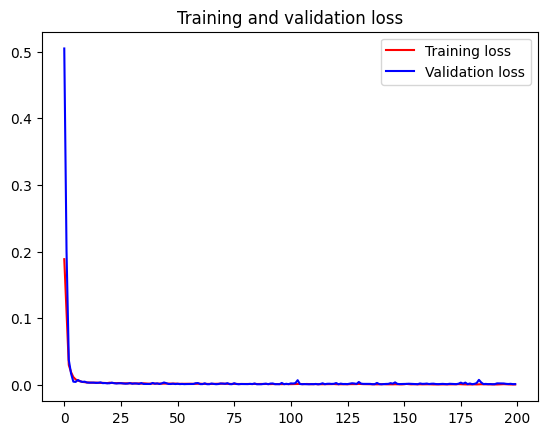

<Figure size 640x480 with 0 Axes>

In [213]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(loss))

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend(loc=0)
plt.figure()


plt.show()

In [214]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)
train_predict.shape, test_predict.shape

9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


((276, 1), (58, 1))

In [215]:
# Transform back to original form

train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)
original_ytrain = scaler.inverse_transform(y_train.reshape(-1,1))
original_ytest = scaler.inverse_transform(y_test.reshape(-1,1)) 

In [216]:
# Evaluation metrices RMSE and MAE
print("Train data RMSE: ", math.sqrt(mean_squared_error(original_ytrain,train_predict)))
print("Train data MSE: ", mean_squared_error(original_ytrain,train_predict))
print("Train data MAE: ", mean_absolute_error(original_ytrain,train_predict))
print("-------------------------------------------------------------------------------------")
print("Test data RMSE: ", math.sqrt(mean_squared_error(original_ytest,test_predict)))
print("Test data MSE: ", mean_squared_error(original_ytest,test_predict))
print("Test data MAE: ", mean_absolute_error(original_ytest,test_predict))

Train data RMSE:  1332.7761811789876
Train data MSE:  1776292.3491180455
Train data MAE:  936.6299182599637
-------------------------------------------------------------------------------------
Test data RMSE:  1733.5605023826597
Test data MSE:  3005232.0154212196
Test data MAE:  1365.415544193966


In [217]:
print("Train data explained variance regression score:",
      explained_variance_score(original_ytrain, train_predict))
print("Test data explained variance regression score:",
      explained_variance_score(original_ytest, test_predict))


Train data explained variance regression score: 0.9921243669468968
Test data explained variance regression score: 0.7423185677483259


In [218]:
print("Train data R2 score:", r2_score(original_ytrain, train_predict))
print("Test data R2 score:", r2_score(original_ytest, test_predict))

Train data R2 score: 0.9913873793923064
Test data R2 score: 0.7177441232430447


In [219]:
print("Train data MGD: ", mean_gamma_deviance(original_ytrain, train_predict))
print("Test data MGD: ", mean_gamma_deviance(original_ytest, test_predict))
print("----------------------------------------------------------------------")
print("Train data MPD: ", mean_poisson_deviance(original_ytrain, train_predict))
print("Test data MPD: ", mean_poisson_deviance(original_ytest, test_predict))

Train data MGD:  0.0008971519224862366
Test data MGD:  0.0007147191661615382
----------------------------------------------------------------------
Train data MPD:  37.87368837649051
Test data MPD:  46.311690723105755


In [220]:
# shift train predictions for plotting

look_back= time_step
trainPredictPlot = np.empty_like(closedf)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
print("Train predicted data: ", trainPredictPlot.shape)

# shift test predictions for plotting
testPredictPlot = np.empty_like(closedf)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(closedf)-1, :] = test_predict
print("Test predicted data: ", testPredictPlot.shape)

names = cycle(['Original close price','Train predicted close price','Test predicted close price'])


plotdf = pd.DataFrame({'date': close_stock['Date'],
                       'original_close': close_stock['Close'],
                       'train_predicted_close': trainPredictPlot.reshape(1,-1)[0].tolist(),
                       'test_predicted_close': testPredictPlot.reshape(1,-1)[0].tolist()})

fig = px.line(plotdf,x=plotdf['date'], y=[plotdf['original_close'],plotdf['train_predicted_close'],
                                          plotdf['test_predicted_close']],
              labels={'value':'Stock price','date': 'Date'})
fig.update_layout(title_text='Comparision between original close price vs predicted close price',
                  plot_bgcolor='white', font_size=15, font_color='black', legend_title_text='Close Price')
fig.for_each_trace(lambda t:  t.update(name = next(names)))

fig.update_xaxes(showgrid=True)
fig.update_yaxes(showgrid=True)
fig.show()

Train predicted data:  (366, 1)
Test predicted data:  (366, 1)


In [221]:
x_input=test_data[len(test_data)-time_step:].reshape(1,-1)
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

from numpy import array

lst_output=[]
n_steps=time_step
i=0
pred_days = 30
while(i<pred_days):

    if(len(temp_input)>time_step):

        x_input=np.array(temp_input[1:])
        #print("{} day input {}".format(i,x_input))
        x_input = x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))

        yhat = model.predict(x_input, verbose=0)
        #print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)

        lst_output.extend(yhat.tolist())
        i=i+1

    else:

        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        temp_input.extend(yhat[0].tolist())

        lst_output.extend(yhat.tolist())
        i=i+1

print("Output of predicted next days: ", len(lst_output))

Output of predicted next days:  30


In [222]:
#Generating arrays for ploting
last_days=np.arange(1,time_step+1)
day_pred=np.arange(time_step+1,pred_days+1+time_step)
print(last_days)
print(day_pred)


[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
[16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39
 40 41 42 43 44 45]


In [223]:
temp_mat=np.empty((len(last_days)+pred_days+1,1))
temp_mat[:]=np.nan
temp_mat=temp_mat.reshape(1,-1).tolist()[0]

In [224]:

last_original_days_value = np.empty(time_step + pred_days)
next_predicted_days_value = np.empty(time_step + pred_days)

last_original_days_value[:time_step] = scaler.inverse_transform(closedf[len(closedf) - time_step:]).reshape(1, -1).tolist()[0]
last_original_days_value[time_step:] = np.nan  # Padding with NaN for plotting
next_predicted_days_value[:time_step] = np.nan  # Padding with NaN for plotting
next_predicted_days_value[time_step:] = scaler.inverse_transform(np.array(lst_output).reshape(-1, 1)).reshape(1, -1).tolist()[0]

# Create DataFrame for plotting
new_pred_plot = pd.DataFrame({
    'last_original_days_value': last_original_days_value,
    'next_predicted_days_value': next_predicted_days_value
})

# Plot with Plotly
names = cycle(['Last 15 days close price', 'Predicted next 30 days close price'])

fig = px.line(new_pred_plot, x=new_pred_plot.index, y=[new_pred_plot['last_original_days_value'],
                                                       new_pred_plot['next_predicted_days_value']],
              labels={'value': 'Stock price', 'index': 'Timestamp'})
fig.update_layout(title_text='Compare last 15 days vs next 30 days',
                  plot_bgcolor='white', font_size=15, font_color='black', legend_title_text='Close Price')

fig.for_each_trace(lambda t: t.update(name=next(names)))
fig.update_xaxes(showgrid=True)
fig.update_yaxes(showgrid=True)
fig.show()


In [225]:
lstmdf=closedf.tolist()
lstmdf.extend((np.array(lst_output).reshape(-1,1)).tolist())
lstmdf=scaler.inverse_transform(lstmdf).reshape(1,-1).tolist()[0]

names = cycle(['Close price'])

fig = px.line(lstmdf,labels={'value': 'Stock price','index': 'Timestamp'})
fig.update_layout(title_text='Plotting whole closing stock price with prediction',
                  plot_bgcolor='white', font_size=15, font_color='black',legend_title_text='Stock')

fig.for_each_trace(lambda t:  t.update(name = next(names)))

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()